## **IRIS.BARUBELAJAR | KAGGLE COMPETITION BY IRIS COMMUNITY**

### **Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import optuna

### **Import Dataset**

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### **Data Understanding**

In [3]:
train.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15687492,596,jabar,Male,32.0,3.0,150268487.1,2.0,0.0,0.0,6.493161e+07,0
1,15736963,623,Jawa Timur,Male,43.0,1.0,0.0,2.0,1.0,1.0,2.274471e+08,0
2,15721730,601,Jawa Tengah,Female,44.0,4.0,0.0,2.0,1.0,0.0,9.099373e+07,0
3,15762134,506,Jawa Barat,Male,59.0,8.0,185140916.0,2.0,1.0,1.0,2.652056e+08,0
4,15648898,560,Jawa Tengah,Female,27.0,NaN,194221253.6,1.0,1.0,1.0,1.781762e+08,0
5,15659064,790,jateng,Male,37.0,8.0,0.0,2.0,1.0,1.0,2.321693e+08,0
6,15761986,439,Jawa Tengah,Female,32.0,3.0,215828099.7,1.0,1.0,0.0,1.176024e+08,0
7,15713354,597,jabar,Female,22.0,6.0,157757184.8,1.0,1.0,0.0,1.095894e+08,1
8,15593454,678,Jawa Tengah,Female,40.0,4.0,176815734.9,1.0,1.0,NaN,2.582256e+07,0
9,15690134,464,jawabarat,Female,42.0,3.0,133130132.2,1.0,1.0,1.0,2.549892e+08,0


In [4]:
test.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,15782993,624,Jawa Timur,Male,51,10,191743610.0,2,1,1,1.986174e+08
1,15640442,717,Jawa Timur,Male,31,4,201565523.7,1,0,0,6.398102e+07
2,15606003,566,Jawa Timur,Female,21,3,0.0,2,1,1,5.634882e+06
3,15672374,672,Jawa Timur,Male,52,8,264163135.8,1,0,0,8.764698e+07
4,15630725,649,Jawa Timur,Female,45,5,144173768.0,1,1,0,2.693794e+08
5,15812338,485,Jawa Tengah,Female,30,7,0.0,1,1,0,1.663634e+08
6,15622470,772,Jawa Tengah,Male,41,10,149216784.1,1,1,1,1.178193e+08
7,15690021,502,Jawa Barat,Female,42,0,205108435.3,1,0,1,4.382546e+07
8,15777855,649,Jawa Timur,Male,45,7,0.0,2,0,1,1.168538e+08
9,15577985,574,Jawa Timur,Female,34,5,174531976.9,2,1,1,2.795855e+07


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       7000 non-null   int64  
 1   credit_score      7000 non-null   int64  
 2   country           6845 non-null   object 
 3   gender            7000 non-null   object 
 4   age               6759 non-null   float64
 5   tenure            6712 non-null   float64
 6   balance           6883 non-null   float64
 7   products_number   6852 non-null   float64
 8   credit_card       6841 non-null   float64
 9   active_member     6863 non-null   float64
 10  estimated_salary  6855 non-null   float64
 11  churn             7000 non-null   int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 656.4+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       3000 non-null   int64  
 1   credit_score      3000 non-null   int64  
 2   country           3000 non-null   object 
 3   gender            3000 non-null   object 
 4   age               3000 non-null   int64  
 5   tenure            3000 non-null   int64  
 6   balance           3000 non-null   float64
 7   products_number   3000 non-null   int64  
 8   credit_card       3000 non-null   int64  
 9   active_member     3000 non-null   int64  
 10  estimated_salary  3000 non-null   float64
dtypes: float64(2), int64(7), object(2)
memory usage: 257.9+ KB


In [7]:
train['churn'].value_counts()

0    5590
1    1410
Name: churn, dtype: int64

### **Data Preprocessing**

#### Drop Irrelevant Feature

In [8]:
train= train.drop(['customer_id'], axis=1)
test = test.drop(['customer_id'], axis=1)

#### Split Dataset

In [9]:
numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
binary_features = ['credit_card', 'active_member']
categorical_features = ['country', 'gender']

#### Handling Inconsistency Data

In [10]:
change_country = {
    'jawatimur': 'Jawa Timur',
    'jatim': 'Jawa Timur',
    'Jawa Timur': 'Jawa Timur',
    'jawabarat': 'Jawa Barat',
    'jabar': 'Jawa Barat',
    'Jawa Barat': 'Jawa Barat',
    'jawatengah': 'Jawa Tengah',
    'jateng': 'Jawa Tengah',
    'Jawa Tengah': 'Jawa Tengah',
}

train['country'] = train['country'].map(change_country)

print(train.head())

   credit_score      country  gender   age  tenure      balance  \
0           596   Jawa Barat    Male  32.0     3.0  150268487.1   
1           623   Jawa Timur    Male  43.0     1.0          0.0   
2           601  Jawa Tengah  Female  44.0     4.0          0.0   
3           506   Jawa Barat    Male  59.0     8.0  185140916.0   
4           560  Jawa Tengah  Female  27.0     NaN  194221253.6   

   products_number  credit_card  active_member  estimated_salary  churn  
0              2.0          0.0            0.0      6.493161e+07      0  
1              2.0          1.0            1.0      2.274471e+08      0  
2              2.0          1.0            0.0      9.099373e+07      0  
3              2.0          1.0            1.0      2.652056e+08      0  
4              1.0          1.0            1.0      1.781762e+08      0  


In [11]:
train['country'].value_counts()

Jawa Timur     3424
Jawa Barat     1749
Jawa Tengah    1672
Name: country, dtype: int64

In [12]:
test['country'].value_counts()

Jawa Timur     1507
Jawa Tengah     762
Jawa Barat      731
Name: country, dtype: int64

#### Check Outliers

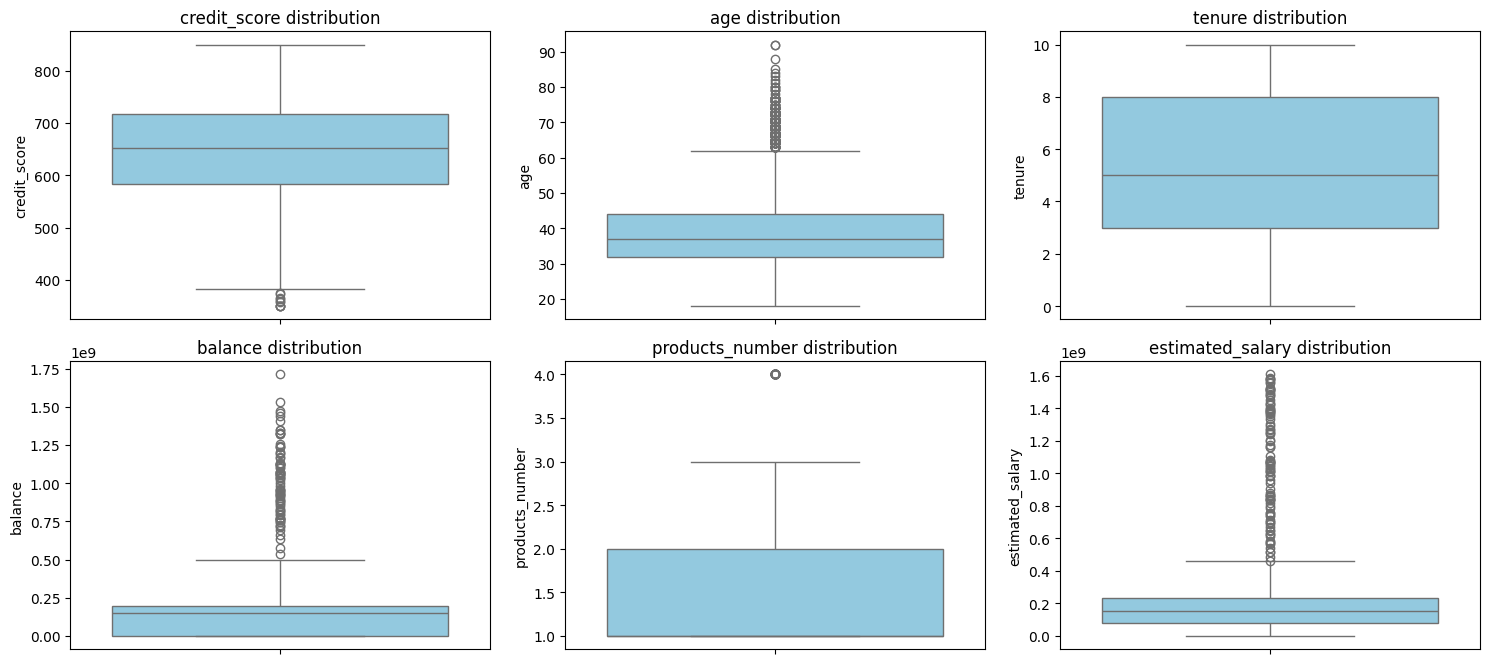

In [13]:
#Training Data
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=train[column], color="skyblue")
    plt.title(f'{column} distribution')

plt.tight_layout()
plt.show()

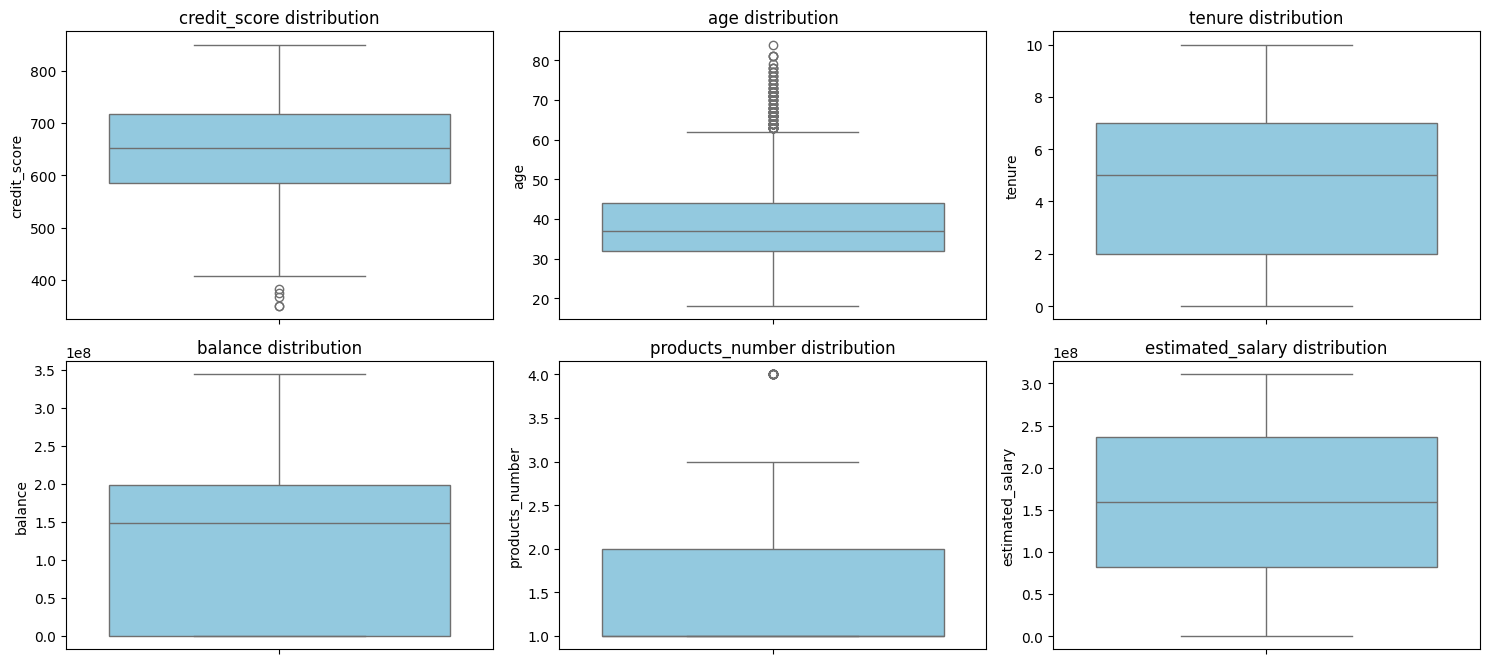

In [14]:
#Testing Data 
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=test[column], color="skyblue")
    plt.title(f'{column} distribution')

plt.tight_layout()
plt.show()

#### Check Distribution Data

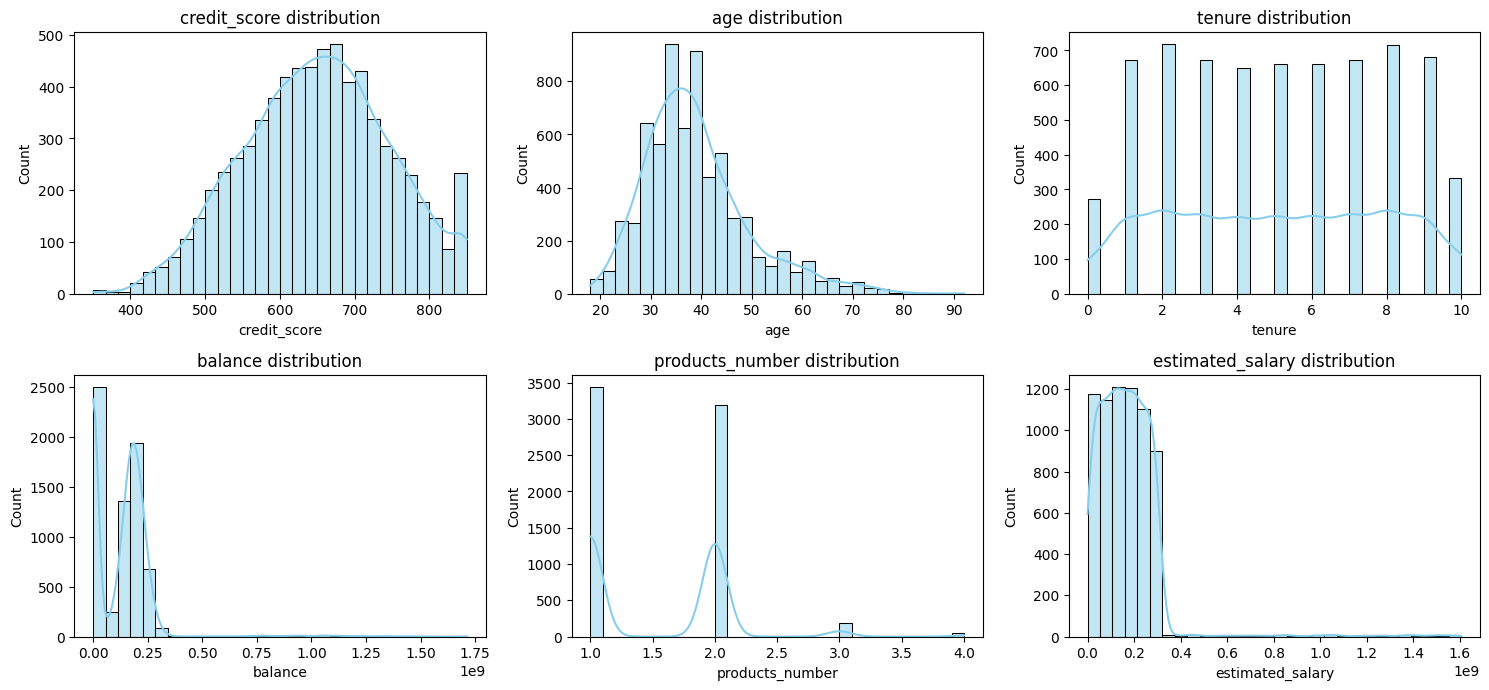

In [15]:
# Training Data | Numerical Features
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(train[column], kde=True, bins=30, color='skyblue') 
    plt.title(f'{column} distribution')

plt.tight_layout()
plt.show()

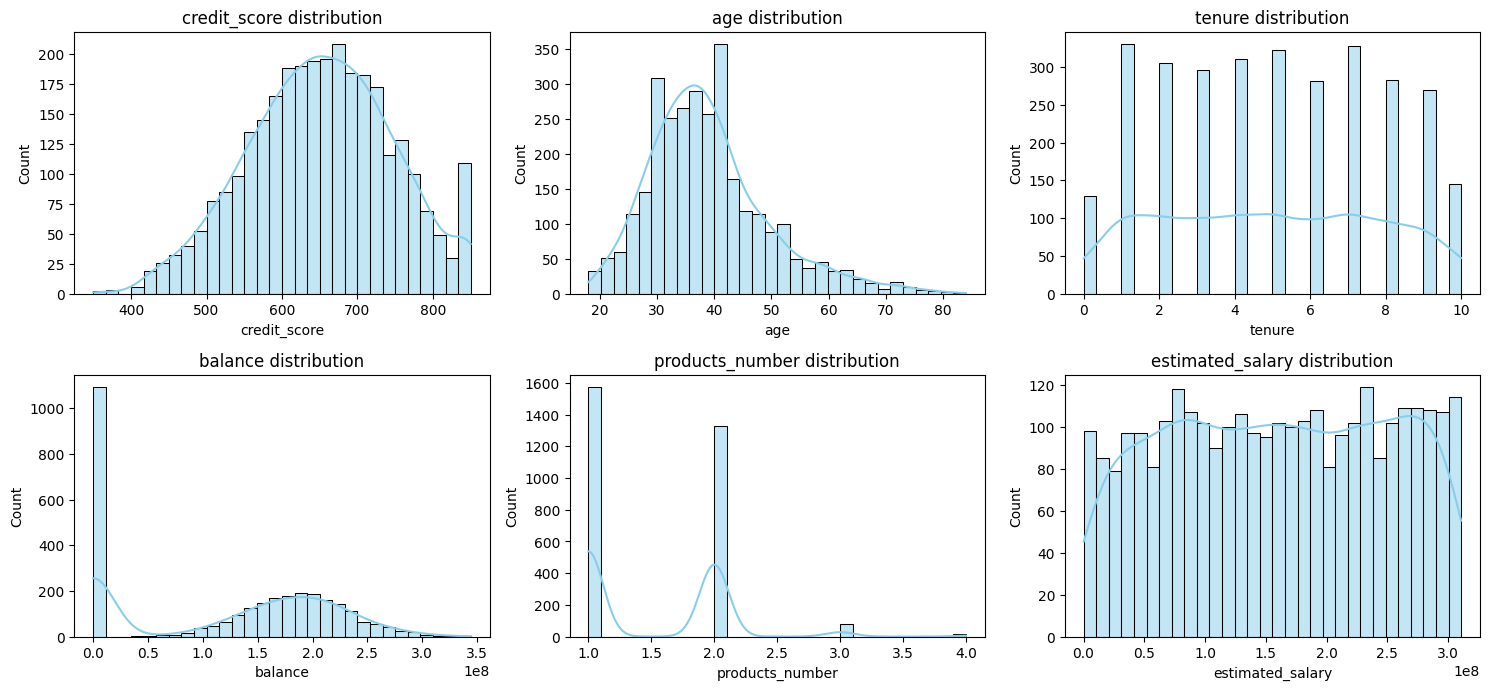

In [16]:
# Testing Data | Numerical Features
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(test[column], kde=True, bins=30, color='skyblue') 
    plt.title(f'{column} distribution')

plt.tight_layout()
plt.show()

#### EDA Categorical Features

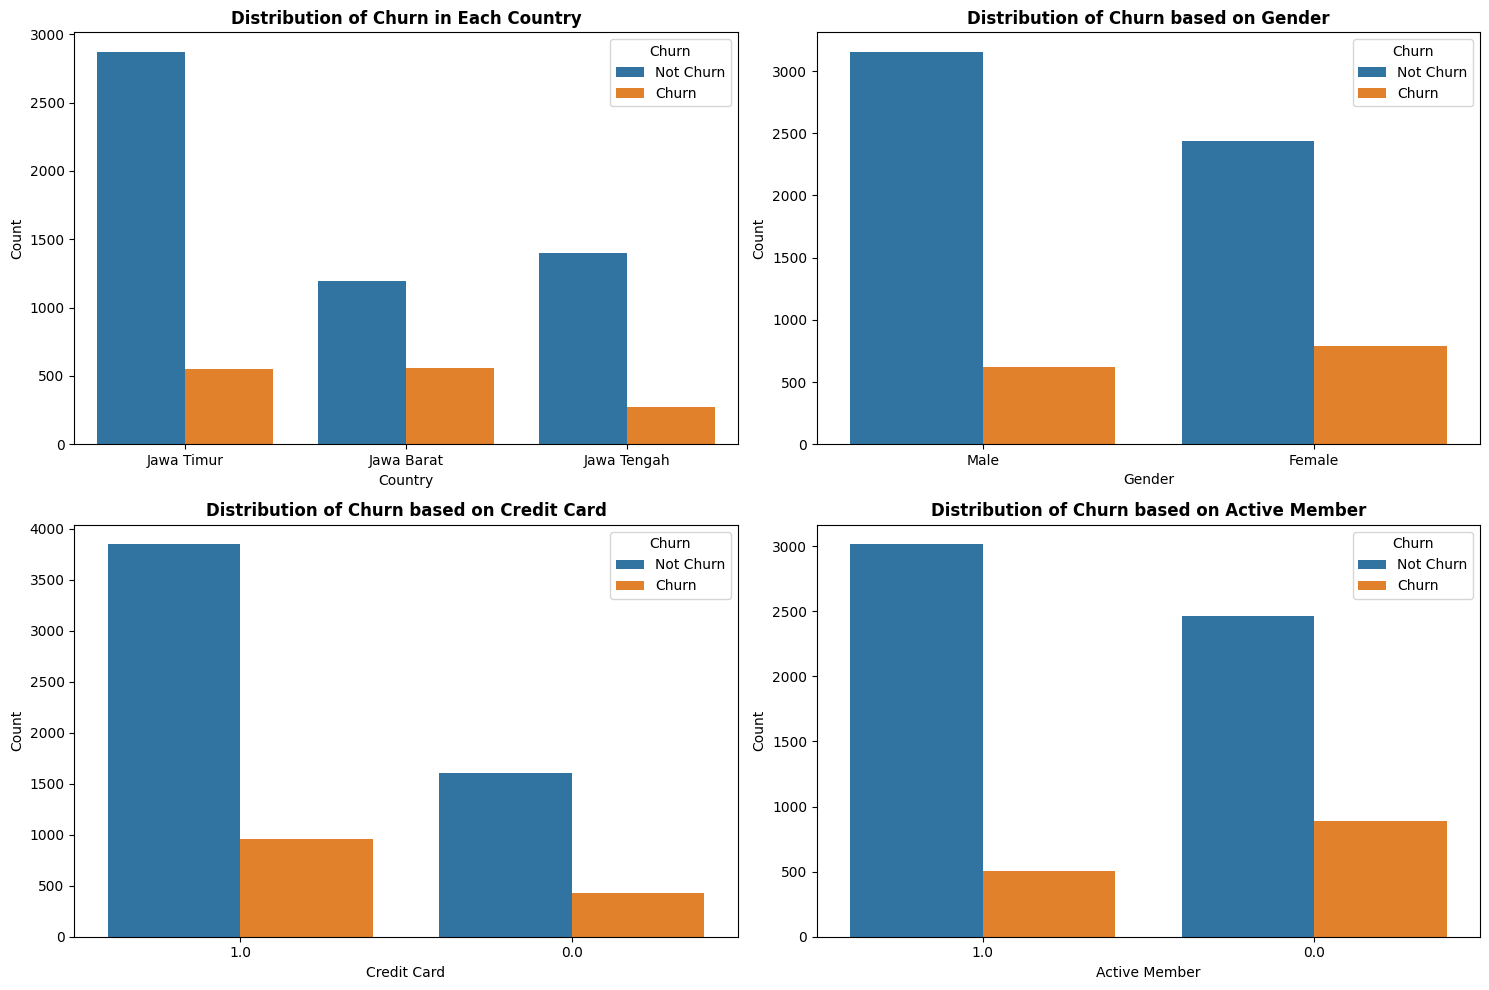

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

plot_columns = [('country', 'Distribution of Churn in Each Country', 'Country'),
                ('gender', 'Distribution of Churn based on Gender', 'Gender'),
                ('credit_card', 'Distribution of Churn based on Credit Card', 'Credit Card'),
                ('active_member', 'Distribution of Churn based on Active Member', 'Active Member')]

for i, (column, title, xlabel) in enumerate(plot_columns):
    sns.countplot(data=train, x=column, hue='churn', order=train[column].value_counts().index, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(title, fontweight='bold')
    axes[i//2, i%2].set_xlabel(xlabel)
    axes[i//2, i%2].set_ylabel("Count")
    axes[i//2, i%2].legend(title="Churn", loc='upper right', labels=['Not Churn', 'Churn'])
    axes[i//2, i%2].tick_params(axis='x')

plt.tight_layout()
plt.show()


In [18]:
print(pd.crosstab(train.churn, train.country))
print(pd.crosstab(train.churn, train.country, normalize="index"))

country  Jawa Barat  Jawa Tengah  Jawa Timur
churn                                       
0              1191         1400        2870
1               558          272         554
country  Jawa Barat  Jawa Tengah  Jawa Timur
churn                                       
0          0.218092     0.256363    0.525545
1          0.403179     0.196532    0.400289


In [19]:
print(pd.crosstab(train.churn, train.gender))
print(pd.crosstab(train.churn, train.gender, normalize="index"))

gender  Female  Male
churn               
0         2436  3154
1          790   620
gender    Female      Male
churn                     
0       0.435778  0.564222
1       0.560284  0.439716


#### Check Correlation (Heatmap)

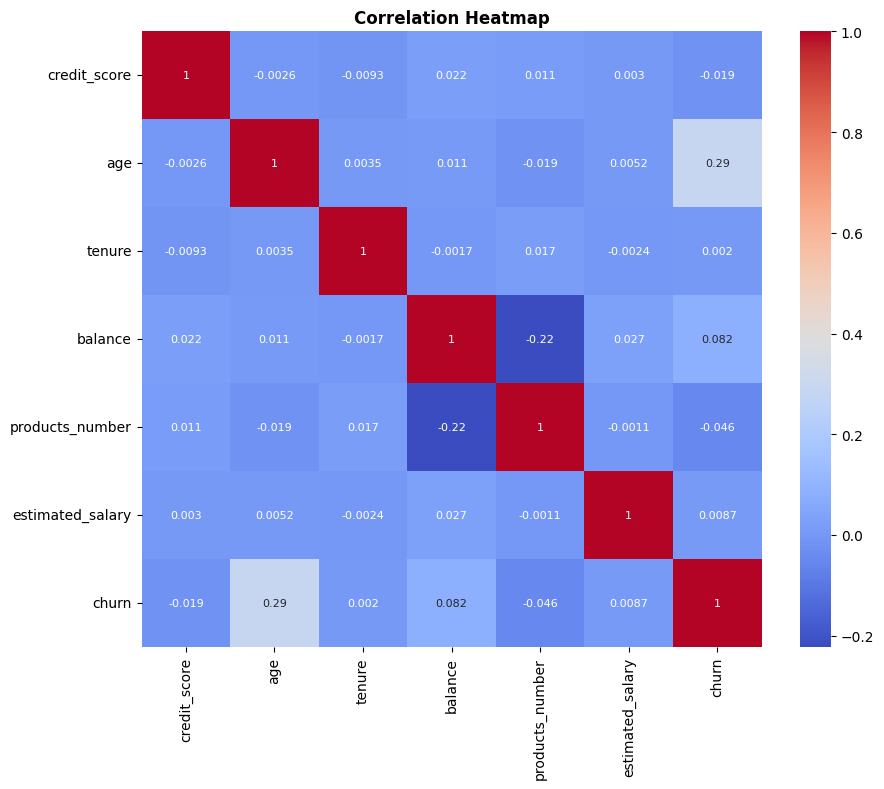

In [20]:
numeric_features_with_churn = numeric_features + ['churn']

plt.figure(figsize=(10, 8))
correlation = train[numeric_features_with_churn].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.title('Correlation Heatmap', fontsize=12, fontweight='bold')
plt.show()


### **Splitting Data**

In [21]:
X=train.drop(['churn'],axis=1)
y=train['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

### **Preprocessor**

In [22]:
numeric_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(max_iter=10, random_state=0)),
    ('scaler', StandardScaler())
])

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('bin', binary_transformer, binary_features),
        ('cat', categorical_transformer, categorical_features)
    ])


### **Modelling**

### K-Nearest Neighbor (KNN)

In [23]:
model_knn = Pipeline(steps=[('preprocessor', preprocessor),
                            ('knn', KNeighborsClassifier())]) 

In [24]:
parameter = {
    "knn__n_neighbors" : np.arange(1, 100, 2),
    "knn__weights" : ["uniform", "distance"],
    "knn__p" : [1, 2]
}

tuning_knn = GridSearchCV(model_knn, param_grid=parameter, cv = 3, n_jobs=-1, verbose=1, scoring="f1")
tuning_knn.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          IterativeImputer(random_state=0)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['credit_score',
                                                                          'age',
                                                                          'tenure',
                                                                          'balance',
                                                                          'products_number',
                                                                          'estimated_salary']),
                                                                        ('bin',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['c...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['country',
                                                                          'gender'])])),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             verbose=1)

In [49]:
# Predictions on training set
y_train_pred = tuning_knn.predict(X_train)
# Predictions on testing set
y_test_pred = tuning_knn.predict(X_test)

# F1 score on training set
f1_train_knn = f1_score(y_train, y_train_pred, average='binary') 

# F1 score on testing set
f1_test_knn = f1_score(y_test, y_test_pred, average='binary')  

# Print the F1 scores
print("F1 Score on Training Set:", f1_train_knn)
print("F1 Score on Testing Set:", f1_test_knn)

# Print other relevant information
print("Best Parameters:", tuning_knn.best_params_)
print("Accuracy on Training Set:", tuning_knn.score(X_train, y_train))
print("Best Cross-Validated Score:", tuning_knn.best_score_)
print("Accuracy on Testing Set:", tuning_knn.score(X_test, y_test))


F1 Score on Training Set: 1.0
F1 Score on Testing Set: 0.4912280701754386
Best Parameters: {'knn__n_neighbors': 19, 'knn__p': 2, 'knn__weights': 'distance'}
Accuracy on Training Set: 1.0
Best Cross-Validated Score: 0.8387752052913154
Accuracy on Testing Set: 0.8480952380952381


#### Support Vector Machine (SVM)

In [26]:
model_svm = Pipeline(steps=[('preprocessor', preprocessor),
                            ('svm', SVC())]) 

In [27]:
# Define parameter grid for SVC
param_grid = {'svm__C': [0.1, 1, 10, 20],
              'svm__kernel': ['linear', 'rbf'],
              'svm__gamma': ['scale', 'auto']}

# Create GridSearchCV object
tuning_svm = GridSearchCV(model_svm, param_grid, cv=5, scoring="f1", n_jobs=-1)

# Fit the model with hyperparameter tuning
tuning_svm.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          IterativeImputer(random_state=0)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['credit_score',
                                                                          'age',
                                                                          'tenure',
                                                                          'balance',
                                                                          'products_number',
                                                                          'estimated_salary']),
                                                                        ('bin',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['credit_card',
                                                                          'active_member']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['country',
                                                                          'gender'])])),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.1, 1, 10, 20],
                         'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [51]:
# Predictions on training set
y_train_pred = tuning_svm.predict(X_train)
# Predictions on testing set
y_test_pred = tuning_svm.predict(X_test)

# F1 score on training set
f1_train_svm = f1_score(y_train, y_train_pred, average='binary') 

# F1 score on testing set
f1_test_svm = f1_score(y_test, y_test_pred, average='binary')  

# Print the F1 scores
print("F1 Score on Training Set:", f1_train_svm)
print("F1 Score on Testing Set:", f1_test_svm)

# Print other relevant information
print("Best Parameters:", tuning_svm.best_params_)
print("Accuracy on Training Set:", tuning_svm.score(X_train, y_train))
print("Best Cross-Validated Score:", tuning_svm.best_score_)
print("Accuracy on Testing Set:", tuning_svm.score(X_test, y_test))


F1 Score on Training Set: 0.5994729907773385
F1 Score on Testing Set: 0.5325077399380804
Best Parameters: {'svm__C': 10, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}
Accuracy on Training Set: 0.8759183673469387
Best Cross-Validated Score: 0.8508163265306123
Accuracy on Testing Set: 0.8561904761904762


#### RandomForest

In [29]:
model_rf = Pipeline(steps=[('preprocessor', preprocessor),
                            ('rf', RandomForestClassifier())])

In [30]:
param_grid_rf = {
    'rf__n_estimators': [50, 100, 150],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

tuning_rf = GridSearchCV(model_rf, param_grid=param_grid_rf, cv=5, scoring="f1", n_jobs=-1)
tuning_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          IterativeImputer(random_state=0)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['credit_score',
                                                                          'age',
                                                                          'tenure',
                                                                          'balance',
                                                                          'products_number',
                                                                          'estimated_salary']),
                                                                        ('bin',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['c...
                                                                          'active_member']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['country',
                                                                          'gender'])])),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [None, 10, 20, 30],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [31]:
# Predictions on training set
y_train_pred = tuning_rf.predict(X_train)
# Predictions on testing set
y_test_pred = tuning_rf.predict(X_test)

# F1 score on training set
f1_train_rf = f1_score(y_train, y_train_pred, average='binary') 

# F1 score on testing set
f1_test_rf = f1_score(y_test, y_test_pred, average='binary')  

# Print the F1 scores
print("F1 Score on Training Set:", f1_train_rf)
print("F1 Score on Testing Set:", f1_test_rf)

# Print other relevant information
print("Best Parameters:", tuning_rf.best_params_)
print("Accuracy on Training Set:", tuning_rf.score(X_train, y_train))
print("Best Cross-Validated Score:", tuning_rf.best_score_)
print("Accuracy on Testing Set:", tuning_rf.score(X_test, y_test))


F1 Score on Training Set: 0.7228464419475655
F1 Score on Testing Set: 0.5345622119815667
Best Parameters: {'rf__max_depth': 30, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Accuracy on Training Set: 0.9093877551020408
Best Cross-Validated Score: 0.8622448979591837
Accuracy on Testing Set: 0.8557142857142858


#### ExtraTreesClassifier

In [32]:
model_ef = Pipeline(steps=[('preprocessor', preprocessor),
                            ('ef', ExtraTreesClassifier())])

In [33]:
param_grid_ef = {
    'ef__n_estimators': [50, 100, 150],
    'ef__max_depth': [None, 10, 20, 30],
    'ef__min_samples_split': [2, 5, 10],
    'ef__min_samples_leaf': [1, 2, 4],
    'ef__bootstrap': [True, False],
    'ef__criterion': ['gini', 'entropy']
}

tuning_ef = GridSearchCV(model_ef, param_grid=param_grid_ef, cv=5, scoring="f1", n_jobs=-1)
tuning_ef.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          IterativeImputer(random_state=0)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['credit_score',
                                                                          'age',
                                                                          'tenure',
                                                                          'balance',
                                                                          'products_number',
                                                                          'estimated_salary']),
                                                                        ('bin',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['c...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['country',
                                                                          'gender'])])),
                                       ('ef', ExtraTreesClassifier())]),
             param_grid={'ef__bootstrap': [True, False],
                         'ef__criterion': ['gini', 'entropy'],
                         'ef__max_depth': [None, 10, 20, 30],
                         'ef__min_samples_leaf': [1, 2, 4],
                         'ef__min_samples_split': [2, 5, 10],
                         'ef__n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [34]:
# Predictions on training set
y_train_pred = tuning_ef.predict(X_train)
# Predictions on testing set
y_test_pred = tuning_ef.predict(X_test)

# F1 score on training set
f1_train_ef = f1_score(y_train, y_train_pred, average='binary') 

# F1 score on testing set
f1_test_ef = f1_score(y_test, y_test_pred, average='binary')  

# Print the F1 scores
print("F1 Score on Training Set:", f1_train_ef)
print("F1 Score on Testing Set:", f1_test_ef)

# Print other relevant information
print("Best Parameters:", tuning_ef.best_params_)
print("Accuracy on Training Set:", tuning_ef.score(X_train, y_train))
print("Best Cross-Validated Score:", tuning_ef.best_score_)
print("Accuracy on Testing Set:", tuning_ef.score(X_test, y_test))

F1 Score on Training Set: 0.637873754152824
F1 Score on Testing Set: 0.48585690515806984
Best Parameters: {'ef__bootstrap': True, 'ef__criterion': 'entropy', 'ef__max_depth': 30, 'ef__min_samples_leaf': 1, 'ef__min_samples_split': 10, 'ef__n_estimators': 50}
Accuracy on Training Set: 0.8887755102040816
Best Cross-Validated Score: 0.8544897959183674
Accuracy on Testing Set: 0.8528571428571429


#### CatBoost Classifier

In [35]:
model_catboost = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('catboost', CatBoostClassifier())])

In [81]:
param_grid_catboost = {
    'catboost__iterations': [100, 200, 300],
    'catboost__learning_rate': [0.01, 0.1, 0.2],
    'catboost__depth': [3, 4, 5]
}

tuning_catboost = GridSearchCV(model_catboost, param_grid=param_grid_catboost, cv=5, scoring="f1", n_jobs=-1)

tuning_catboost.fit(X_train, y_train)

0:	learn: 0.6013422	total: 1.93ms	remaining: 191ms
1:	learn: 0.5395144	total: 3.87ms	remaining: 190ms
2:	learn: 0.5008760	total: 5.56ms	remaining: 180ms
3:	learn: 0.4665995	total: 8.13ms	remaining: 195ms
4:	learn: 0.4396077	total: 9.93ms	remaining: 189ms
5:	learn: 0.4221466	total: 12.1ms	remaining: 189ms
6:	learn: 0.4069378	total: 13.9ms	remaining: 185ms
7:	learn: 0.3944812	total: 15.6ms	remaining: 179ms
8:	learn: 0.3870709	total: 17.5ms	remaining: 177ms
9:	learn: 0.3794997	total: 19.3ms	remaining: 173ms
10:	learn: 0.3736117	total: 21ms	remaining: 170ms
11:	learn: 0.3662738	total: 24.2ms	remaining: 178ms
12:	learn: 0.3607047	total: 26.1ms	remaining: 175ms
13:	learn: 0.3581359	total: 27.7ms	remaining: 170ms
14:	learn: 0.3550066	total: 29.4ms	remaining: 167ms
15:	learn: 0.3532150	total: 31ms	remaining: 163ms
16:	learn: 0.3510915	total: 32.5ms	remaining: 159ms
17:	learn: 0.3489486	total: 34.2ms	remaining: 156ms
18:	learn: 0.3469804	total: 35.8ms	remaining: 152ms
19:	learn: 0.3458798	total

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          IterativeImputer(random_state=0)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['credit_score',
                                                                          'age',
                                                                          'tenure',
                                                                          'balance',
                                                                          'products_number',
                                                                          'estimated_salary']),
                                                                        ('bin',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['c...
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['country',
                                                                          'gender'])])),
                                       ('catboost',
                                        <catboost.core.CatBoostClassifier object at 0x0000028D5E905B10>)]),
             n_jobs=-1,
             param_grid={'catboost__depth': [3, 4, 5],
                         'catboost__iterations': [100, 200, 300],
                         'catboost__learning_rate': [0.01, 0.1, 0.2]},
             scoring='f1')

In [82]:
# Predictions on training set
y_train_pred = tuning_catboost.predict(X_train)
# Predictions on testing set
y_test_pred = tuning_catboost.predict(X_test)

# F1 score on training set
f1_train_catboost = f1_score(y_train, y_train_pred, average='binary') 

# F1 score on testing set
f1_test_catboost = f1_score(y_test, y_test_pred, average='binary')  

# Print the F1 scores
print("F1 Score on Training Set:", f1_train_catboost)
print("F1 Score on Testing Set:", f1_test_catboost)

# Print other relevant information
print("Best Parameters:", tuning_catboost.best_params_)
print("Accuracy on Training Set:", tuning_catboost.score(X_train, y_train))
print("Best Cross-Validated Score:", tuning_catboost.best_score_)
print("Accuracy on Testing Set:", tuning_catboost.score(X_test, y_test))


F1 Score on Training Set: 0.625233064014916
F1 Score on Testing Set: 0.5722627737226278
Best Parameters: {'catboost__depth': 4, 'catboost__iterations': 100, 'catboost__learning_rate': 0.2}
Accuracy on Training Set: 0.625233064014916
Best Cross-Validated Score: 0.5764266042300022
Accuracy on Testing Set: 0.5722627737226278


#### XGBoost Classifier

In [38]:
model_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                             ('xgb', XGBClassifier())])

In [83]:
param_grid_xgb = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__max_depth': [3, 4, 5]
}

tuning_xgb = GridSearchCV(model_xgb, param_grid=param_grid_xgb, cv=5, scoring="f1", n_jobs=-1)
tuning_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          IterativeImputer(random_state=0)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['credit_score',
                                                                          'age',
                                                                          'tenure',
                                                                          'balance',
                                                                          'products_number',
                                                                          'estimated_salary']),
                                                                        ('bin',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['c...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgb__learning_rate': [0.01, 0.1, 0.2],
                         'xgb__max_depth': [3, 4, 5],
                         'xgb__n_estimators': [100, 200, 300]},
             scoring='f1')

In [84]:
# Predictions on training set
y_train_pred = tuning_xgb.predict(X_train)
# Predictions on testing set
y_test_pred = tuning_xgb.predict(X_test)

# F1 score on training set
f1_train_xgb = f1_score(y_train, y_train_pred, average='binary') 

# F1 score on testing set
f1_test_xgb = f1_score(y_test, y_test_pred, average='binary')  

# Print the F1 scores
print("F1 Score on Training Set:", f1_train_xgb)
print("F1 Score on Testing Set:", f1_test_xgb)

# Print other relevant information
print("Best Parameters:", tuning_xgb.best_params_)
print("Accuracy on Training Set:", tuning_xgb.score(X_train, y_train))
print("Best Cross-Validated Score:", tuning_xgb.best_score_)
print("Accuracy on Testing Set:", tuning_xgb.score(X_test, y_test))


F1 Score on Training Set: 0.7883720930232558
F1 Score on Testing Set: 0.5627705627705627
Best Parameters: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 200}
Accuracy on Training Set: 0.7883720930232558
Best Cross-Validated Score: 0.5702016404647984
Accuracy on Testing Set: 0.5627705627705627


#### LightGBM

In [85]:
model_lgb = Pipeline(steps=[('preprocessor', preprocessor),
                            ('lgb', LGBMClassifier())])

In [86]:
param_grid_lgb = {
    'lgb__n_estimators': [100, 200, 300],
    'lgb__learning_rate': [0.01, 0.1, 0.2],
    'lgb__max_depth': [3, 4, 5]
}

tuning_lgb = GridSearchCV(model_lgb, param_grid=param_grid_lgb, cv=5, scoring="f1", n_jobs=-1)
tuning_lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 987, number of negative: 3913
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1016
[LightGBM] [Info] Number of data points in the train set: 4900, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.201429 -> initscore=-1.377390
[LightGBM] [Info] Start training from score -1.377390
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          IterativeImputer(random_state=0)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['credit_score',
                                                                          'age',
                                                                          'tenure',
                                                                          'balance',
                                                                          'products_number',
                                                                          'estimated_salary']),
                                                                        ('bin',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['credit_card',
                                                                          'active_member']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['country',
                                                                          'gender'])])),
                                       ('lgb', LGBMClassifier())]),
             n_jobs=-1,
             param_grid={'lgb__learning_rate': [0.01, 0.1, 0.2],
                         'lgb__max_depth': [3, 4, 5],
                         'lgb__n_estimators': [100, 200, 300]},
             scoring='f1')

In [87]:
# Predictions on training set
y_train_pred = tuning_lgb.predict(X_train)
# Predictions on testing set
y_test_pred = tuning_lgb.predict(X_test)

# F1 score on training set
f1_train_lgb = f1_score(y_train, y_train_pred, average='binary') 

# F1 score on testing set
f1_test_lgb = f1_score(y_test, y_test_pred, average='binary')  

# Print the F1 scores
print("F1 Score on Training Set:", f1_train_lgb)
print("F1 Score on Testing Set:", f1_test_lgb)

# Print other relevant information
print("Best Parameters:", tuning_lgb.best_params_)
print("Accuracy on Training Set:", tuning_lgb.score(X_train, y_train))
print("Best Cross-Validated Score:", tuning_lgb.best_score_)
print("Accuracy on Testing Set:", tuning_lgb.score(X_test, y_test))


F1 Score on Training Set: 0.659190031152648
F1 Score on Testing Set: 0.5622254758418741
Best Parameters: {'lgb__learning_rate': 0.2, 'lgb__max_depth': 3, 'lgb__n_estimators': 100}
Accuracy on Training Set: 0.659190031152648
Best Cross-Validated Score: 0.5691617114730434
Accuracy on Testing Set: 0.5622254758418741


#### AdaBoost

In [44]:
model_adaboost = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('adaboost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier()))])

In [78]:
param_grid_adaboost = {
    'adaboost__n_estimators': [50, 100, 150],
    'adaboost__learning_rate': [0.01, 0.1, 0.2],
    'adaboost__base_estimator__max_depth': [3, 4, 5]
}

tuning_adaboost = GridSearchCV(model_adaboost, param_grid=param_grid_adaboost, cv=5, scoring='f1', n_jobs=-1)
tuning_adaboost.fit(X_train, y_train)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166:

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          IterativeImputer(random_state=0)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['credit_score',
                                                                          'age',
                                                                          'tenure',
                                                                          'balance',
                                                                          'products_number',
                                                                          'estimated_salary']),
                                                                        ('bin',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['c...
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['country',
                                                                          'gender'])])),
                                       ('adaboost',
                                        AdaBoostClassifier(base_estimator=DecisionTreeClassifier()))]),
             param_grid={'adaboost__base_estimator__max_depth': [3, 4, 5],
                         'adaboost__learning_rate': [0.01, 0.1, 0.2],
                         'adaboost__n_estimators': [50, 100, 150]},
             scoring='f1')

In [79]:
# Predictions on training set
y_train_pred = tuning_adaboost.predict(X_train)
# Predictions on testing set
y_test_pred = tuning_adaboost.predict(X_test)

# F1 score on training set
f1_train_adaboost = f1_score(y_train, y_train_pred, average='binary') 

# F1 score on testing set
f1_test_adaboost = f1_score(y_test, y_test_pred, average='binary')  

# Print the F1 scores
print("F1 Score on Training Set:", f1_train_adaboost)
print("F1 Score on Testing Set:", f1_test_adaboost)

# Print other relevant information
print("Best Parameters:", tuning_adaboost.best_params_)
print("Accuracy on Training Set:", tuning_adaboost.score(X_train, y_train))
print("Best Cross-Validated Score:", tuning_adaboost.best_score_)
print("Accuracy on Testing Set:", tuning_adaboost.score(X_test, y_test))

F1 Score on Training Set: 0.6409119696010134
F1 Score on Testing Set: 0.5647058823529412
Best Parameters: {'adaboost__base_estimator__max_depth': 5, 'adaboost__learning_rate': 0.01, 'adaboost__n_estimators': 150}
Accuracy on Training Set: 0.6409119696010134
Best Cross-Validated Score: 0.555862039655824
Accuracy on Testing Set: 0.5647058823529412


### **Evaluation**

In [88]:
results = {
    'Model': ['KNN (Tuned)', 'SVM (Tuned)', 'Random Forest (RF)', 'Extra Trees (EF)', 'CatBoost (Cat)', 'XGBoost (XGB)', 'LightGBM (LGB)', 'AdaBoost (Adaboost)'],
    'F1 Score (Train)': [f1_train_knn, f1_train_svm, f1_train_rf, f1_train_ef, f1_train_catboost, f1_train_xgb, f1_train_lgb, f1_train_adaboost],
    'F1 Score (Test)': [f1_test_knn, f1_test_svm,f1_test_rf, f1_test_ef, f1_test_catboost, f1_test_xgb, f1_test_lgb, f1_test_adaboost]
}

df_results = pd.DataFrame(results)

print(df_results)

                 Model  F1 Score (Train)  F1 Score (Test)
0          KNN (Tuned)          1.000000         0.491228
1          SVM (Tuned)          0.599473         0.532508
2   Random Forest (RF)          0.722846         0.534562
3     Extra Trees (EF)          0.637874         0.485857
4       CatBoost (Cat)          0.625233         0.572263
5        XGBoost (XGB)          0.788372         0.562771
6       LightGBM (LGB)          0.659190         0.562225
7  AdaBoost (Adaboost)          0.640912         0.564706


In [61]:
lst_encode = ['country', 'gender']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in lst_encode:
  test[i] = le.fit_transform(test[i])

test.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,624,2,1,51,10,191743610.0,2,1,1,1.986174e+08
1,717,2,1,31,4,201565523.7,1,0,0,6.398102e+07
2,566,2,0,21,3,0.0,2,1,1,5.634882e+06
3,672,2,1,52,8,264163135.8,1,0,0,8.764698e+07
4,649,2,0,45,5,144173768.0,1,1,0,2.693794e+08


In [89]:
test1 = pd.read_csv("test.csv")

In [90]:
# Predict on the validation set using the best model

y_pred = tuning_catboost.predict(test1)


pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['customer_id'],pred],axis=1)
datasets.columns=['customer_id','churn']
datasets.to_csv('catboost1.csv',index=False)

In [76]:
df = pd.read_csv("catboost1.csv")

In [77]:
df['churn'].value_counts()

0    2594
1     406
Name: churn, dtype: int64